# Accessing Data

In [ ]:
import os
from os import listdir

In [ ]:
import numpy as np
import librosa

In [ ]:
alldata=np.array(os.listdir("/content/drive/MyDrive/VinylML/DATA"))

In [ ]:
librosa.get_samplerate("/content/drive/MyDrive/VinylML/DATA/01Rev sect1.wav")

22050

note for labelling:
*   sw- star wars by london symphony
*   rev- revolver beatles
*   p1999- prince 1999
*   dsotm- dark side of the moon
*   rth-road to hell

# Seeing wave encoding and a sample spectogram

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

An example, scratched sample:

0.027435303
0.025405884
0.02734375
0.029541016
0.034820557
0.043502808
0.04449463
0.049545288
0.051574707
0.047286987


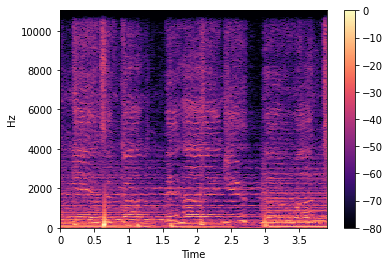

In [ ]:
samplesong="/content/drive/MyDrive/VinylML/DATA/159DSOTM sect1.wav"
stream=librosa.stream(samplesong,block_length=2048,frame_length=2048,hop_length=2048)

for iblock in stream:
  for block in range(1015,1025):
    print(iblock[block])
  dblock=librosa.stft(iblock,center=False)
  sampledecib=librosa.amplitude_to_db(np.abs(dblock),ref=np.max)
  plt.figure()
  librosa.display.specshow(sampledecib,x_axis='time',y_axis='linear')
  plt.colorbar()

ipd.Audio(samplesong)

log representation helps refine the visibility of the bottom sections that show the scratchy bits

0.027435303
0.025405884
0.02734375
0.029541016
0.034820557
0.043502808
0.04449463
0.049545288
0.051574707
0.047286987


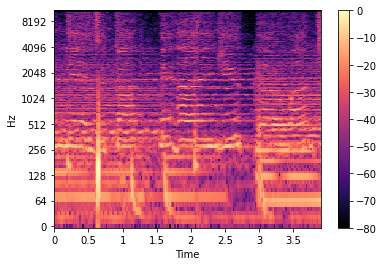

In [ ]:
samplesong="/content/drive/MyDrive/VinylML/DATA/159DSOTM sect1.wav"
stream=librosa.stream(samplesong,block_length=2048,frame_length=2048,hop_length=2048)

for iblock in stream:
  for block in range(1015,1025):
    print(iblock[block])
  dblock=librosa.stft(iblock,center=False)
  sampledecib=librosa.amplitude_to_db(np.abs(dblock),ref=np.max)
  plt.figure()
  librosa.display.specshow(sampledecib,x_axis='time',y_axis='log')
  plt.colorbar()

ipd.Audio(samplesong)

# Creating the dataframe

In [ ]:
import pandas as pd

In [ ]:
print(str(len(alldata)))
dataf=pd.DataFrame({'name':alldata},columns=['name'])
dataf.head(3)

3429


,name
0,462SW sect0.wav
1,462Rev sect0.wav
2,463DSOTM sect0.wav


In [ ]:
noisy=[]
for file in alldata:
  label=file[len(file)-5]
  noisy.append(label)
noisy[0:5]

['0', '0', '0', '0', '0']

In [ ]:
i=0
for label in noisy:
  if label=="1":
    noisy[i]="True"
  else:
    noisy[i]="False"
  i+=1
noisy[0:5]


['False', 'False', 'False', 'False', 'False']

noisy- holds true false for scracth

alldata- file name

general path- "/content/drive/MyDrive/VinylML/DATA/"


paths- concatenated paths

In [ ]:
paths=[]
for file in alldata:
  gen="/content/drive/MyDrive/VinylML/DATA/"+file
  paths.append(gen)
paths[0:5]

['/content/drive/MyDrive/VinylML/DATA/462SW sect0.wav',
 '/content/drive/MyDrive/VinylML/DATA/462Rev sect0.wav',
 '/content/drive/MyDrive/VinylML/DATA/463DSOTM sect0.wav',
 '/content/drive/MyDrive/VinylML/DATA/463CR_RTH sect0.wav',
 '/content/drive/MyDrive/VinylML/DATA/462DSOTM sect0.wav']

In [ ]:
print(type(noisy),type(alldata),type(paths))

<class 'list'> <class 'numpy.ndarray'> <class 'list'>


In [ ]:
noisyarr=np.array(noisy)
pathsarr=np.array(paths)

In [ ]:
alldata=list(alldata)

In [ ]:
noisy[1:5]

['False', 'False', 'False', 'False']

In [ ]:
paths[1:5]

['/content/drive/MyDrive/VinylML/DATA/462Rev sect0.wav',
 '/content/drive/MyDrive/VinylML/DATA/463DSOTM sect0.wav',
 '/content/drive/MyDrive/VinylML/DATA/463CR_RTH sect0.wav',
 '/content/drive/MyDrive/VinylML/DATA/462DSOTM sect0.wav']

In [ ]:
d={"name":alldata,"isnoisy":noisy,"path":paths}

In [ ]:
all=pd.DataFrame(data=d)
all.head()

,name,isnoisy,path
0,462SW sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/462SW sect...
1,462Rev sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/462Rev sec...
2,463DSOTM sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/463DSOTM s...
3,463CR_RTH sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/463CR_RTH ...
4,462DSOTM sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/462DSOTM s...


separating to see count, have an even split, etc

In [ ]:
isNoisy=pd.DataFrame(all.loc[all['isnoisy']=="True"])
notNoisy=pd.DataFrame(all.loc[all['isnoisy']=="False"])

In [ ]:
isNoisy.shape

(1141, 3)

In [ ]:
notNoisy.shape

(2288, 3)

to even out for training, we split notnoisy into half at random

In [ ]:
notNoisynew=notNoisy.sample(frac=0.5)
notNoisynew.shape

(1144, 3)

In [ ]:
notNoisynew.head()

,name,isnoisy,path
109,480DSOTM sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/480DSOTM s...
2989,306SW sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/306SW sect...
1285,351P1999 sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/351P1999 s...
1913,447CR_RTH sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/447CR_RTH ...
27,466Rev sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/466Rev sec...


In [ ]:
notNoisynew=notNoisynew.reset_index(drop=True)
notNoisynew.head(2)

,name,isnoisy,path
0,480DSOTM sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/480DSOTM s...
1,306SW sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/306SW sect...


In [ ]:
samplesize=(int)(len(isNoisy)/3)
noisysample1=isNoisy[:samplesize]
notnoisysample1=notNoisynew[:samplesize]

In [ ]:
noisysample2=isNoisy[samplesize:2*samplesize]
notnoisysample2=notNoisynew[samplesize:2*samplesize]

In [ ]:
noisysample3=isNoisy[2*samplesize:]
notnoisysample3=notNoisynew[2*samplesize:]

In [ ]:
testingnoisy=noisysample3.sample(frac=0.35).reset_index(drop=True)
testingnotnoisy=notnoisysample3.sample(frac=0.35).reset_index(drop=True)
testingsamples=pd.concat([testingnoisy,testingnotnoisy]).reset_index(drop=True)
testingsamples.head()

,name,isnoisy,path
0,307CR_RTH sect1.wav,True,/content/drive/MyDrive/VinylML/DATA/307CR_RTH ...
1,279CR_RTH sect1.wav,True,/content/drive/MyDrive/VinylML/DATA/279CR_RTH ...
2,294DSOTM sect1.wav,True,/content/drive/MyDrive/VinylML/DATA/294DSOTM s...
3,19GG sect1.wav,True,/content/drive/MyDrive/VinylML/DATA/19GG sect1...
4,09GG sect1.wav,True,/content/drive/MyDrive/VinylML/DATA/09GG sect1...


In [ ]:
len(testingsamples)

267

In [ ]:
sample1= pd.concat([notnoisysample2,noisysample1]).reset_index(drop=True)
sample2= pd.concat([notnoisysample3,noisysample2]).reset_index(drop=True)
sample3= pd.concat([notnoisysample1,noisysample3]).reset_index(drop=True)

In [ ]:
len(sample3)

761

In [ ]:
sample3['isnoisy'].value_counts()

True     381
False    380
Name: isnoisy, dtype: int64

In [ ]:
training="/content/drive/MyDrive/VinylML/training data4.wav"
trainingstream=librosa.stream(training,block_length=174600,frame_length=1,hop_length=1)
temp=[]
for l in trainingstream:
    for i in l:
        temp.append([i])
td = np.array(temp)
td.reshape(-1, 1)

array([[0.16125488],
       [0.15434265],
       [0.18083191],
       ...,
       [0.15646362],
       [0.11096191],
       [0.0632782 ]], dtype=float32)

In [ ]:
from sklearn.svm import OneClassSVM
from joblib import dump, load

In [ ]:
linearmodel=OneClassSVM(kernel="linear",nu=0.345)
linearmodel.fit(td)

OneClassSVM(kernel='linear', nu=0.345)

function to test model on sample data, one at a time and to visualise

In [ ]:
def predict(f,mod):
  model=mod
  sample=f
  test=librosa.stream(sample,block_length=8820,frame_length=1,hop_length=1)
  val=[]
  for line in test:
    for i in line:
      val.append([i])
  val=np.array(val)
  val.reshape(-1,1)
  pred=model.predict(val)
  clean=0
  noise=0
  for flag in pred:
    if flag==-1:
      clean+=1
    if flag==1:
      noise+=1
  print("frames w noise:"+str(noise)+"\nclean frames:"+str(clean))
  pred.shape
  X=val
  Y=[range(0,X.size)]
  colorscheme=['yellow' if x==1 else 'green' for x in pred]
  plt.scatter(Y,X,c=colorscheme)
  stream=librosa.stream(sample,block_length=2048,frame_length=2048,hop_length=2048)
  for yblock in stream:
    dblock=librosa.stft(yblock,center=False)
    db=librosa.amplitude_to_db(np.abs(dblock),ref=np.max)
    plt.figure()
    librosa.display.specshow(db,x_axis='time',y_axis='log')
    plt.colorbar
  ipd.Audio(f)


In [ ]:
dump(linearmodel,'linearmodel.joblib')

['linearmodel.joblib']

To load model, incase of revision

In [ ]:
#linearmodel=load('linearmodel.joblib')

testing with clean clip

In [ ]:
samplesongclean="/content/drive/MyDrive/VinylML/DATA/130CR_RTH sect0.wav"

In [ ]:
ipd.Audio(samplesongclean)

frames w noise:0
clean frames:88200
CPU times: user 1min 52s, sys: 213 ms, total: 1min 52s
Wall time: 1min 56s


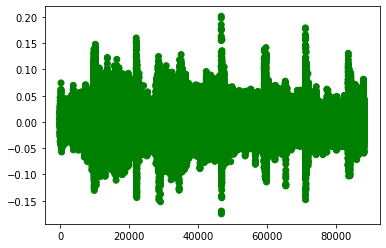

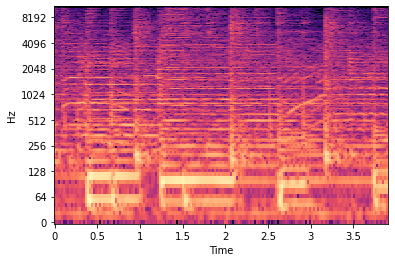

In [ ]:
%%time
predict(samplesongclean,linearmodel)

In [ ]:
#%%time
#samplenoisy2="/content/DATA/DATA/DATA/31CR_RTH sect1.wav"
#predict(samplenoisy2,linearmodel)

In [ ]:
#ipd.Audio(samplenoisy2)

due to resource constraints, we first test it on a smaller dataset, evenly split - testing samples

In [ ]:
model=linearmodel

In [ ]:
smallnoisy=noisysample3.sample(n=20).reset_index(drop=True)
smallnotnoisy=notnoisysample3.sample(n=20).reset_index(drop=True)
smallsamples=pd.concat([smallnoisy,smallnotnoisy]).reset_index(drop=True)
smallsamples.head()

,name,isnoisy,path
0,03P1999 sect1.wav,True,/content/drive/MyDrive/VinylML/DATA/03P1999 se...
1,122SW sect1.wav,True,/content/drive/MyDrive/VinylML/DATA/122SW sect...
2,259P1999 sect1.wav,True,/content/drive/MyDrive/VinylML/DATA/259P1999 s...
3,03DSOTM sect1.wav,True,/content/drive/MyDrive/VinylML/DATA/03DSOTM se...
4,299SW sect1.wav,True,/content/drive/MyDrive/VinylML/DATA/299SW sect...


In [ ]:
len(smallsamples)

40

In [ ]:
samplesreverse=smallsamples.iloc[::-1].reset_index(drop=True)

In [ ]:
samplesreverse.head()

,name,isnoisy,path
0,53P1999 sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/53P1999 se...
1,498GG sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/498GG sect...
2,27P1999 sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/27P1999 se...
3,12CR_RTH sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/12CR_RTH s...
4,103P1999 sect0.wav,False,/content/drive/MyDrive/VinylML/DATA/103P1999 s...


In [ ]:
file_predictions = []

for ind in samplesreverse.index:
    flag = False
    print(samplesreverse.loc[ind,"path"])
    sample = samplesreverse.loc[ind,"path"]
    test = librosa.stream(sample, block_length = 88200, frame_length = 1, hop_length = 1)
    val = []
    for line in test:
        for i in line:
            val.append([i])
    v = np.array(val)
    v.reshape(-1, 1)
    pred = linearmodel.predict(v)
    for p in pred:
        if p == 1:
            flag = True
    file_predictions.append(flag)
    print(flag)

np.savetxt("file_predictions.txt", file_predictions)

/content/drive/MyDrive/VinylML/DATA/53P1999 sect0.wav
True
/content/drive/MyDrive/VinylML/DATA/498GG sect0.wav
False
/content/drive/MyDrive/VinylML/DATA/27P1999 sect0.wav
True
/content/drive/MyDrive/VinylML/DATA/12CR_RTH sect0.wav
False
/content/drive/MyDrive/VinylML/DATA/103P1999 sect0.wav
False
/content/drive/MyDrive/VinylML/DATA/240SW sect0.wav
False
/content/drive/MyDrive/VinylML/DATA/102SW sect0.wav
False
/content/drive/MyDrive/VinylML/DATA/117P1999 sect0.wav
True
/content/drive/MyDrive/VinylML/DATA/281SW sect0.wav
False
/content/drive/MyDrive/VinylML/DATA/37DSOTM sect0.wav
False
/content/drive/MyDrive/VinylML/DATA/417CR_RTH sect0.wav
False
/content/drive/MyDrive/VinylML/DATA/247DSOTM sect0.wav
True
/content/drive/MyDrive/VinylML/DATA/214DSOTM sect0.wav
False
/content/drive/MyDrive/VinylML/DATA/68P1999 sect0.wav
True
/content/drive/MyDrive/VinylML/DATA/363SW sect0.wav
False
/content/drive/MyDrive/VinylML/DATA/161Rev sect0.wav
False
/content/drive/MyDrive/VinylML/DATA/447DSOTM sect

In [ ]:
file_predictions[1:5]

[False, True, False, False]

In [ ]:
correctvals=samplesreverse['isnoisy']

In [ ]:
correctvals=np.array(correctvals)

In [ ]:
d={'expected':correctvals,'predicted':file_predictions}
comparison=pd.DataFrame(data=d)
comparison.head()

,expected,predicted
0,False,True
1,False,False
2,False,True
3,False,False
4,False,False


In [ ]:
k=0
mistaketrue=0
correcttrue=0
mistakefalse=0
correctfalse=0
for i in range (0,len(comparison)):
  if(str(comparison.loc[i,'expected'])==str(comparison.loc[i,'predicted'])):
    k=k+1
    if(str(comparison.loc[i,'expected'])=='True'):
      correcttrue+=1
    else:
      correctfalse+=1
  else:
    if(str(comparison.loc[i,'predicted'])=='True'):
      mistaketrue+=1
    else:
      mistakefalse+=1
accuracy=k/len(comparison)
print("Accuracy="+str(accuracy))
print("false trues:"+str(mistake))

Accuracy=0.825


# FN, FP, FScore

In [1]:
import pandas as pd
import numpy as np

In [ ]:
predictions=np.loadtxt('/content/file_predictions.txt')
predictiontf=[True if k==1.0 else False for k in predictions]
predictiontf

In [13]:
correctvals=["False" if k<20 else "True" for k in range(0,40)]

In [14]:
d={'expected':correctvals,'predicted':predictiontf}
comparison=pd.DataFrame(data=d)
comparison.head()

,expected,predicted
0,False,True
1,False,False
2,False,True
3,False,False
4,False,False


In [17]:
k=0
falsepositive=0
falsenegative=0
truepositive=0
truenegative=0
totalfalse=len(comparison)/2
totaltrue=len(comparison)/2
for i in range (0,len(comparison)):
  if(str(comparison.loc[i,'expected'])==str(comparison.loc[i,'predicted'])):
    if(str(comparison.loc[i,'expected'])=="True"):
      truepositive+=1
    else:
      truenegative+=1
  else:
    if(str(comparison.loc[i,'predicted'])=='True'):
      falsepositive+=1
    else:
      falsenegative+=1
#accuracy=k/len(comparison)

tp=truepositive
tn=truenegative
fn=falsenegative
fp=falsepositive
fscore=tp/(tp+0.5*(fp+fn))
precision=tp/(tp+fp)
recall=tp/(tp+fn)

#print("Accuracy="+str(accuracy))
print("F-score:"+str(fscore))
print("Precision:"+str(precision))
print("Recall:"+str(recall))
print("tp:"+str(tp)+"\ntn:"+str(tn)+"\nfp:"+str(fp)+"\nfn:"+str(fn))

F-score:0.8444444444444444
Precision:0.76
Recall:0.95
tp:19
tn:14
fp:6
fn:1


In [10]:
comparison

,expected,predicted
0,True,True
1,True,False
2,True,True
3,True,False
4,True,False
5,True,False
6,True,False
7,True,True
8,True,False
9,True,False
